# Correlation Coeffients
Here, we compute correlation coefficients between the study variables. We examine the p-values of the coeffients at several thresholds.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
#import matplotlib.patches as mpatches

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
data = pd.read_csv('data/data.csv')

<ipython-input-2-e9bba6ebf1b5>:1: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data/data.csv')


In [4]:
variables = ['CUHI_day_summer', 'CUHI_night_summer', 
             'SUHI_day_summer', 'SUHI_night_summer', 
             'ESABuilt_Area', 'ESAGrass_Area', 'ESATree_Area', 
             'Albedo_Built', 'Albedo_Grass', 'Albedo_Tree', 'DEM_urb_CT', 'Median Income']

In [5]:
labels = ['CUHI Summer Daytime', 'CUHI Summer Nighttime', 
          'SUHI Summer Daytime', 'SUHI Summer Nighttime', 
          'Built Area', 'Grass Area', 'Tree Area', 
          'Built Albedo', 'Grass Albedo', 'Tree Albedo', 'Elevation', 'Median Income']

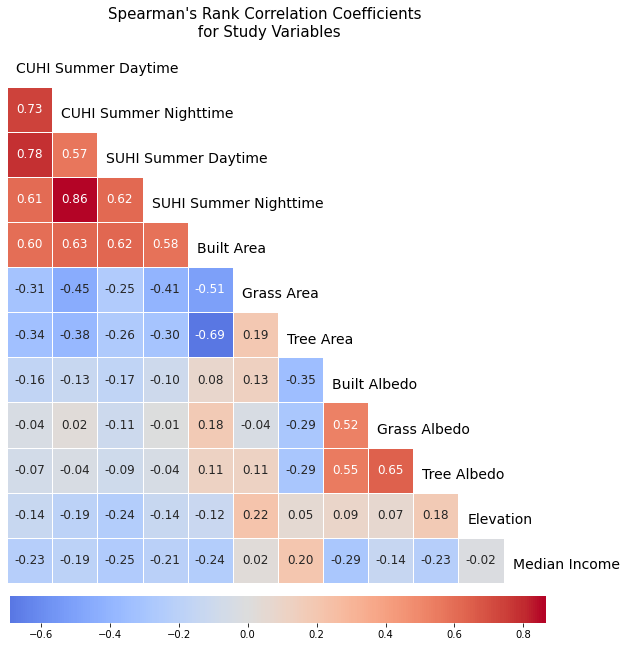

In [14]:
matrix = data[variables].corr(method='spearman')

mask = np.zeros_like(matrix)

mask[np.triu_indices_from(mask)] = True

fig,ax = plt.subplots(figsize=(12,12))

#sns.set(font_scale=1.4)
#sns.heatmap(matrix, center = 0, fmt = ".2f", square = True, annot= True, mask=mask, ax=ax);
sns.heatmap(matrix, center = 0, square = True, mask=mask, ax=ax, fmt = ".2f", annot= True, annot_kws={'size': 12},
            linecolor='white', linewidths=0.5, xticklabels=False, cmap='coolwarm',
            cbar_kws = dict(use_gridspec=False,location="bottom", pad=0.02, shrink=0.8)); #, label="Spearman's Rank Correlation Coefficient"));

#ax.set_xticklabels(labels)
#ax.set_yticklabels(labels, fontsize=12)
plt.tick_params(left = False, labelleft=False) 
#plt.rcParams.update({'font.size': 14})

#ax.tick_params(right=True, labelright=True, bottom=False, labelbottom=False, labelrotation=0, direction='in')
for i, label in enumerate(labels):
    ax.text(i + 0.2, i + 0.6, label, ha='left', va='center', fontsize=14)

plt.suptitle("Spearman's Rank Correlation Coefficients \n for Study Variables", fontsize=15, y=.92)
#plt.text(x=-0.87, y=5, s='(a)', fontsize=24, weight='bold')
plt.savefig('graphs/correlation/feature_correlation.png', bbox_inches='tight', dpi=1280)

## Check the significance of correlation coefficients

In [6]:
# Calculate Spearman correlation and p-values
corr_matrix, p_values = spearmanr(data[variables], nan_policy='omit')

# Create a DataFrame for the correlation matrix
corr_df = pd.DataFrame(corr_matrix, columns=variables, index=variables)

# Create a DataFrame for the p-values
p_values_df = pd.DataFrame(p_values, columns=variables, index=variables)
p_values_df

,CUHI_day_summer,CUHI_night_summer,SUHI_day_summer,SUHI_night_summer,ESABuilt_Area,ESAGrass_Area,ESATree_Area,Albedo_Built,Albedo_Grass,Albedo_Tree,DEM_urb_CT,Median Income
CUHI_day_summer,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.986715e-17,3.090894e-66,6.218577e-230,0.000000e+00
CUHI_night_summer,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.543180e-213,1.681313e-08,6.760596e-18,0.000000e+00,0.000000e+00
SUHI_day_summer,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.299685e-135,2.773294e-108,0.000000e+00,0.000000e+00
SUHI_night_summer,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.239910e-118,1.697965e-01,1.713747e-23,1.827754e-228,0.000000e+00
ESABuilt_Area,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.060354e-81,0.000000e+00,1.073585e-154,8.451848e-188,0.000000e+00
ESAGrass_Area,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.193333e-220,3.196839e-16,1.775339e-160,0.000000e+00,1.823979e-08
ESATree_Area,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.625095e-31,0.000000e+00
Albedo_Built,0.000000e+00,5.543180e-213,0.000000e+00,2.239910e-118,1.060354e-81,2.193333e-220,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.816623e-106,0.000000e+00
Albedo_Grass,2.986715e-17,1.681313e-08,6.299685e-135,1.697965e-01,0.000000e+00,3.196839e-16,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.654503e-57,1.670336e-232
Albedo_Tree,3.090894e-66,6.760596e-18,2.773294e-108,1.713747e-23,1.073585e-154,1.775339e-160,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [16]:
# Create a boolean mask
threshold = 0.0001
mask = p_values_df > threshold

# Apply the mask to the DataFrame
df_masked = p_values_df[mask]
df_masked

,CUHI_day_summer,CUHI_night_summer,SUHI_day_summer,SUHI_night_summer,ESABuilt_Area,ESAGrass_Area,ESATree_Area,Albedo_Built,Albedo_Grass,Albedo_Tree,DEM_urb_CT,Median Income
CUHI_day_summer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CUHI_night_summer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SUHI_day_summer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SUHI_night_summer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.169797,NaN,NaN,NaN
ESABuilt_Area,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ESAGrass_Area,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ESATree_Area,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albedo_Built,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albedo_Grass,NaN,NaN,NaN,0.169797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albedo_Tree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
pd.DataFrame({
    'a = 0.05': (p_values_df >= 0.05).any(),
    'a = 0.01': (p_values_df >= 0.01).any(),
    'a = 0.001': (p_values_df >= 0.001).any(),
    'a = 0.0001': (p_values_df >= 0.0001).any(),
})

,a = 0.05,a = 0.01,a = 0.001,a = 0.0001
CUHI_day_summer,False,False,False,False
CUHI_night_summer,False,False,False,False
SUHI_day_summer,False,False,False,False
SUHI_night_summer,True,True,True,True
ESABuilt_Area,False,False,False,False
ESAGrass_Area,False,False,False,False
ESATree_Area,False,False,False,False
Albedo_Built,False,False,False,False
Albedo_Grass,True,True,True,True
Albedo_Tree,False,False,False,False
